# PCA Vs Manifold Learning

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

import warnings
warnings.filterwarnings('ignore')

## Toy Dataset: Swiss Roll

In [2]:
# Create your own Swiss Roll Data

def SwissRoll (length_angular, length_z, noise_strength, no_of_samples):   
    h = length_angular*np.random.rand(no_of_samples)
    t = np.random.rand(no_of_samples)
    
    X = 1./6*(h + noise_strength*t)*np.sin(h) 
    Y = 1./6*(h + noise_strength*t)*np.cos(h) 
    Z = length_z*t
    
    return np.array([X, Y, Z,h,t]).transpose()

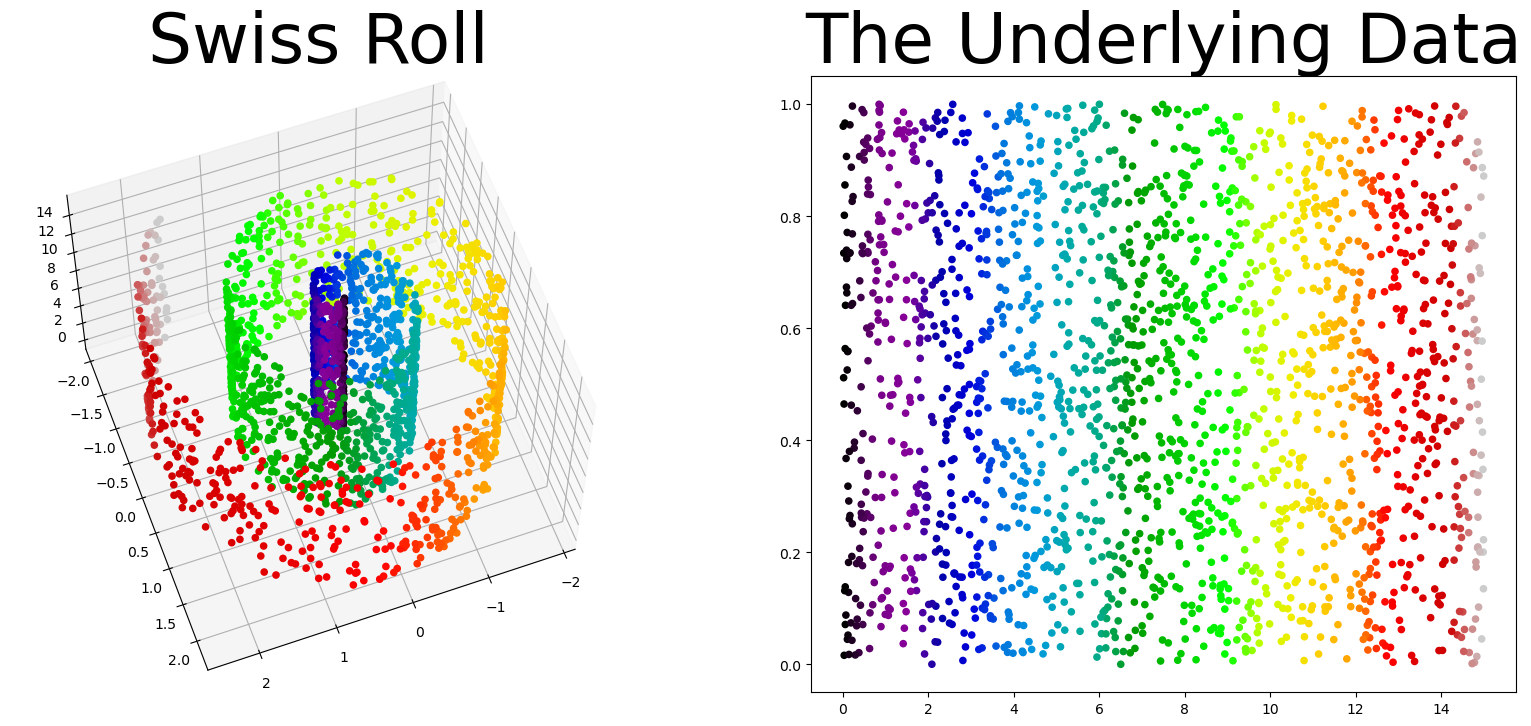

In [3]:
# Plot the data
swiss_roll=SwissRoll (15.0, 15.0, 0.0, 2000)
fig=plt.figure(figsize=(20,8))


ax0 = fig.add_subplot(1,2,1,projection="3d")
fig.add_axes(ax0)
ax0.scatter(swiss_roll [:, 0], swiss_roll [:, 1], swiss_roll[:, 2], c=swiss_roll[:, 3], s=20,alpha=1.,cmap='nipy_spectral')
ax0.set_title("Swiss Roll", fontsize=50)
ax0.view_init(azim=70, elev=60)

ax1 = fig.add_subplot(1,2,2)

fig.add_axes(ax1)
ax1.scatter(swiss_roll [:, 3], swiss_roll [:, 4], c=swiss_roll[:, 3], s=20,alpha=1.0,cmap='nipy_spectral')
ax1.set_title("The Underlying Data", fontsize=50);

### PCA

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [5]:
pipeline = make_pipeline(StandardScaler(),PCA(n_components=3))
swiss_roll_pca= pipeline.fit_transform(swiss_roll [:,0:3])

var_l=pipeline.named_steps['pca'].explained_variance_ratio_*100
var_l=var_l.tolist()

j=1; var0=0.0
for var in var_l:
    print('PC%i variance %3.2f' %(j,var)); j=j+1; var0+=var


print ('Total variance = %3.2f'%sum(var_l) ) 
print ('Variance of first two PCs = %3.2f'%(var_l[0]+var_l[1])) 

PC1 variance 35.51
PC2 variance 33.12
PC3 variance 31.37
Total variance = 100.00
Variance of first two PCs = 68.63


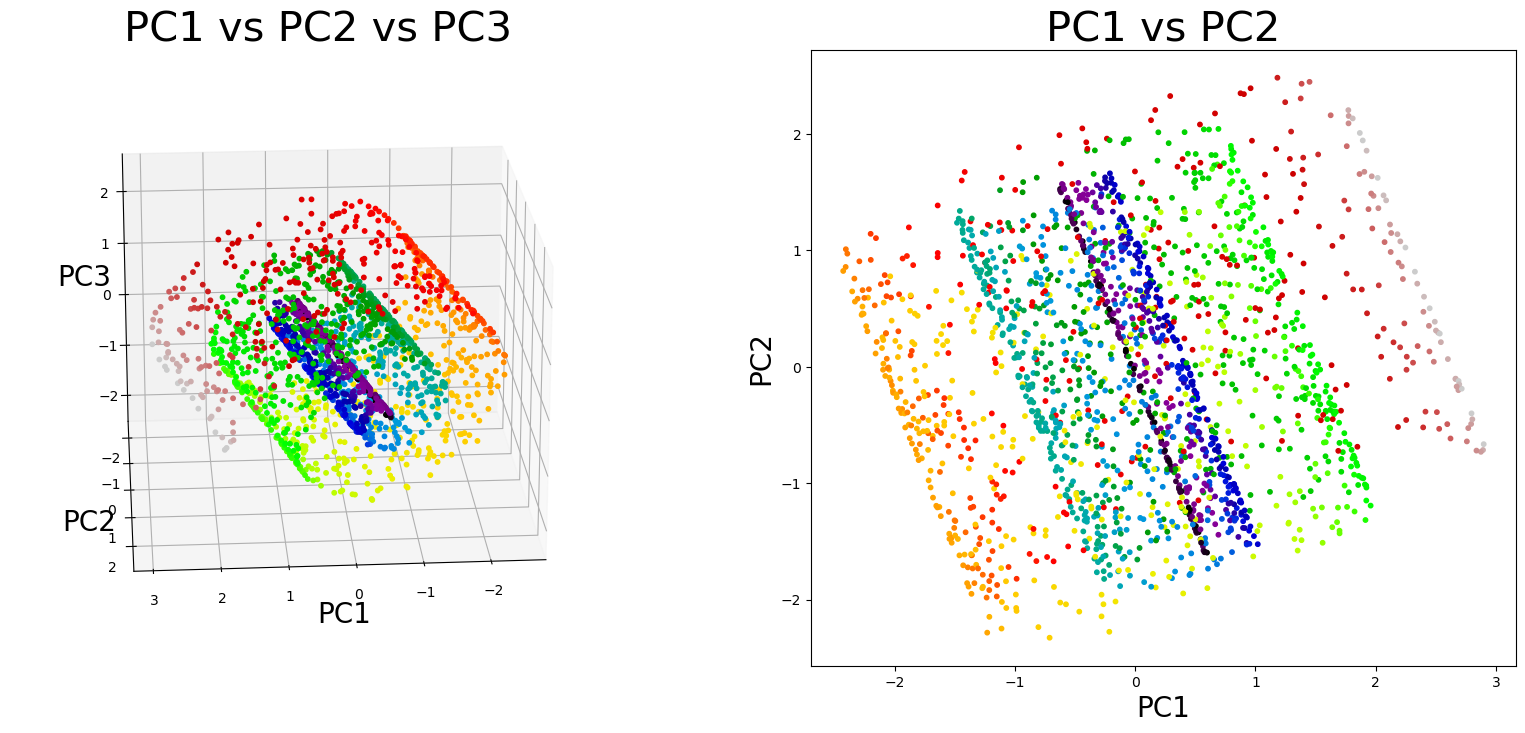

In [6]:
fig=plt.figure(figsize=(20,8))


ax0 = fig.add_subplot(1,2,1,projection="3d")
fig.add_axes(ax0)
ax0.scatter(swiss_roll_pca[:, 0], swiss_roll_pca[:, 1], swiss_roll_pca[:, 2], c=swiss_roll[:, 3], s=10,alpha=1.0,cmap='nipy_spectral')
ax0.set_title("PC1 vs PC2 vs PC3", fontsize=30)
ax0.view_init(azim=86, elev=20)
ax0.set_xlabel('PC1',fontsize=20);ax0.set_ylabel('PC2',fontsize=20);ax0.set_zlabel('PC3',fontsize=20)

ax1 = fig.add_subplot(1,2,2)

fig.add_axes(ax1)
ax1.scatter(swiss_roll_pca[:, 0], swiss_roll_pca[:, 1], c=swiss_roll[:,3], s=10,alpha=1.0,cmap='nipy_spectral')
ax1.set_title("PC1 vs PC2", fontsize=30);
ax1.set_xlabel('PC1',fontsize=20);ax1.set_ylabel('PC2',fontsize=20);

## Laplacian Eigenmaps

In [7]:
from sklearn import metrics
from sklearn.neighbors import kneighbors_graph

### First using manifold.spectral_embedding, gives more options, control over "t" and how you construct the graph

In [8]:
dist_mat=metrics.pairwise_distances(swiss_roll [:,0:3], metric='euclidean')
A=kneighbors_graph(swiss_roll [:,0:3],5, mode='connectivity', include_self=True)
A=A.toarray()


t=5.0
dist_mat=dist_mat*dist_mat
W=np.exp(dist_mat*(-1.0/t))
W=A*W



swiss_roll_le = manifold.spectral_embedding(adjacency=W, n_components=3, norm_laplacian=False, drop_first=True,eigen_solver='lobpcg')

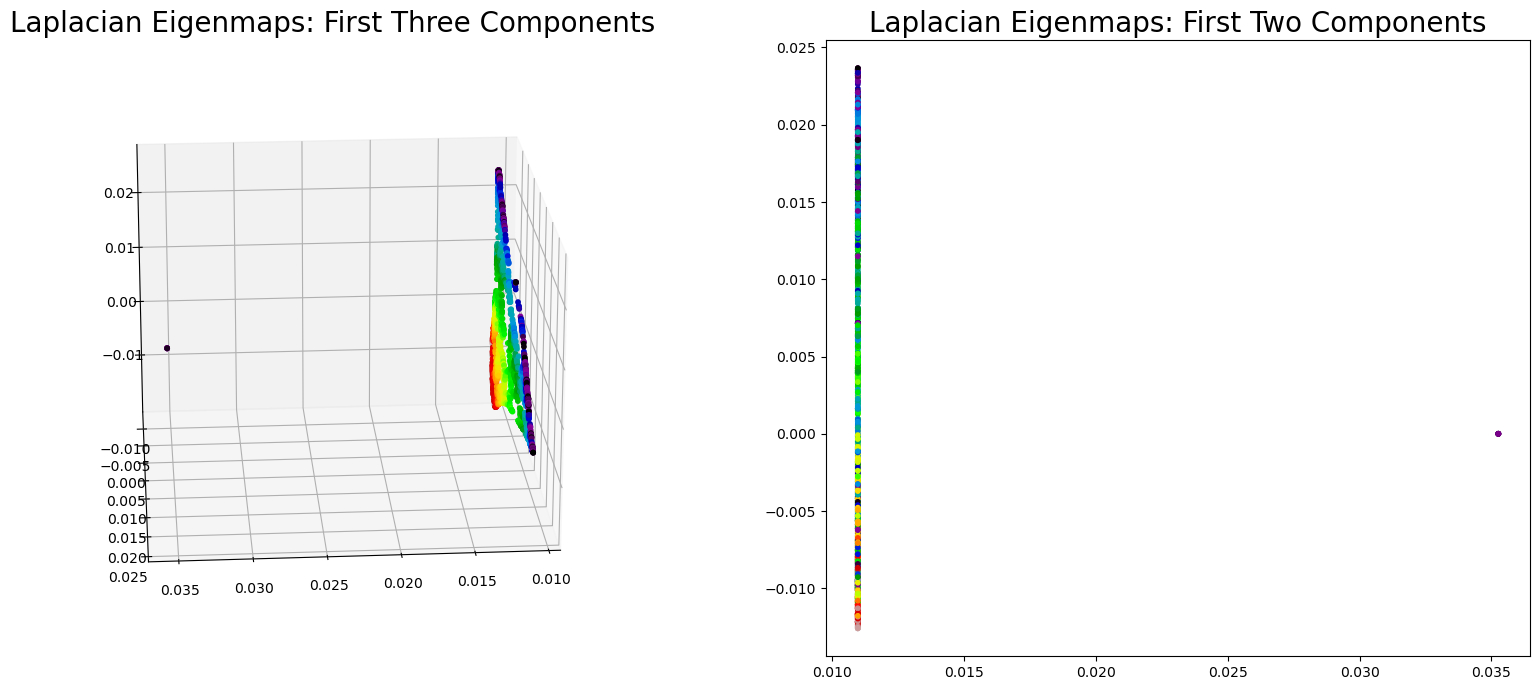

In [14]:
fig=plt.figure(figsize=(20,8))


ax0 = fig.add_subplot(1,2,1,projection="3d")
fig.add_axes(ax0)
ax0.scatter(swiss_roll_le[:, 0], swiss_roll_le[:, 1], swiss_roll_le[:, 2], c=swiss_roll[:,3], s=10,alpha=1.0,cmap='nipy_spectral')
ax0.set_title("Laplacian Eigenmaps: First Three Components", fontsize=20)
ax0.view_init(azim=86, elev=20)

ax1 = fig.add_subplot(1,2,2)

fig.add_axes(ax1)
ax1.scatter(swiss_roll_le[:, 0], swiss_roll_le[:, 1], c=swiss_roll[:,3], s=10,alpha=1.0,cmap='nipy_spectral')
ax1.set_title("Laplacian Eigenmaps: First Two Components", fontsize=20);

### Using manifold.SpectralEmbedding, gives less options for constructing the graph, possibly faster

In [10]:
swiss_roll_le_o  = manifold.SpectralEmbedding(n_components=3,affinity= 'nearest_neighbors',n_neighbors=5)
swiss_roll_le=swiss_roll_le_o.fit_transform(X=swiss_roll[:,0:3])

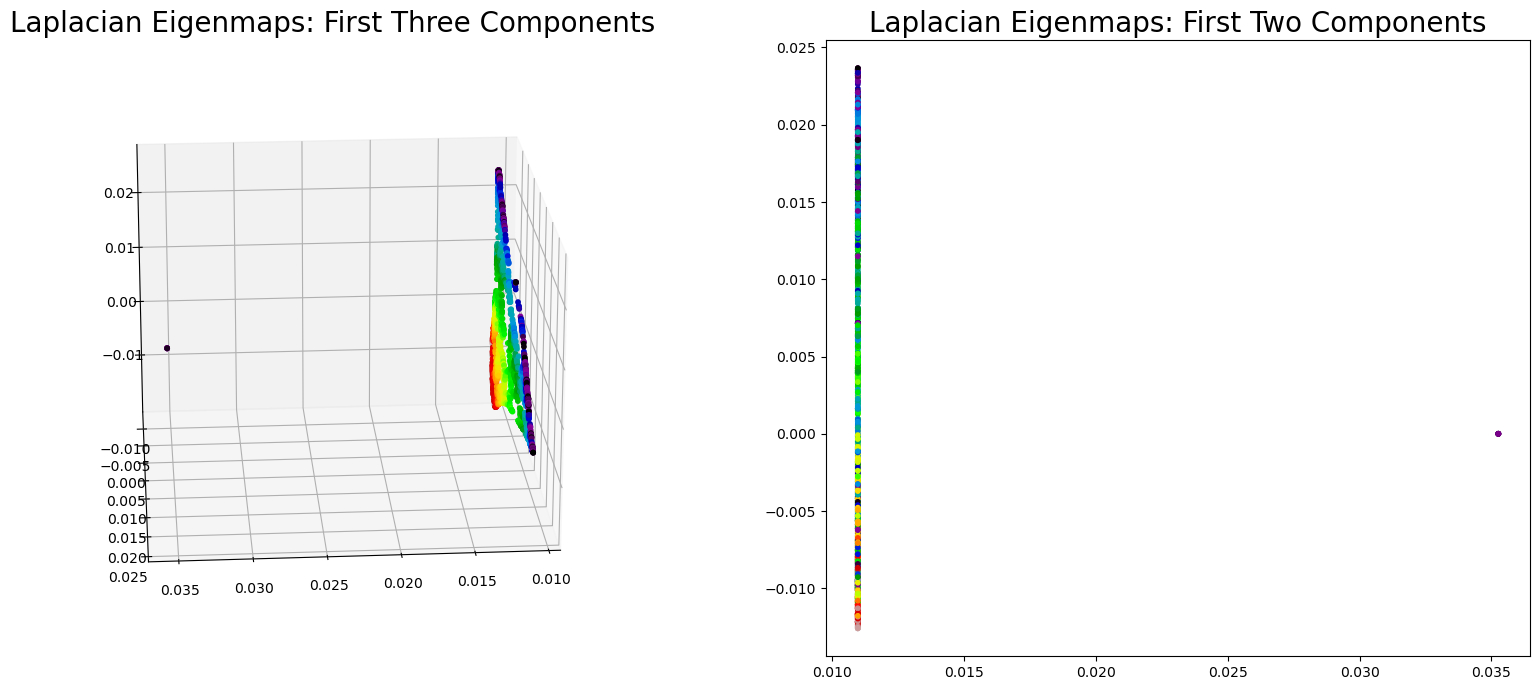

In [11]:
fig=plt.figure(figsize=(20,8))


ax0 = fig.add_subplot(1,2,1,projection="3d")
fig.add_axes(ax0)
ax0.scatter(swiss_roll_le[:, 0], swiss_roll_le[:, 1], swiss_roll_le[:, 2], c=swiss_roll[:,3], s=10,alpha=1.0,cmap='nipy_spectral')
ax0.set_title("Laplacian Eigenmaps: First Three Components", fontsize=20)
ax0.view_init(azim=86, elev=20)

ax1 = fig.add_subplot(1,2,2)

fig.add_axes(ax1)
ax1.scatter(swiss_roll_le[:, 0], swiss_roll_le[:, 1], c=swiss_roll[:,3], s=10,alpha=1.0,cmap='nipy_spectral')
ax1.set_title("Laplacian Eigenmaps: First Two Components", fontsize=20);

## Isomap

In [12]:
swiss_roll_isomap_o  = manifold.Isomap(n_neighbors=10, n_components=3, p=2)
swiss_roll_isomap = swiss_roll_isomap_o.fit_transform(X=swiss_roll[:,0:3])

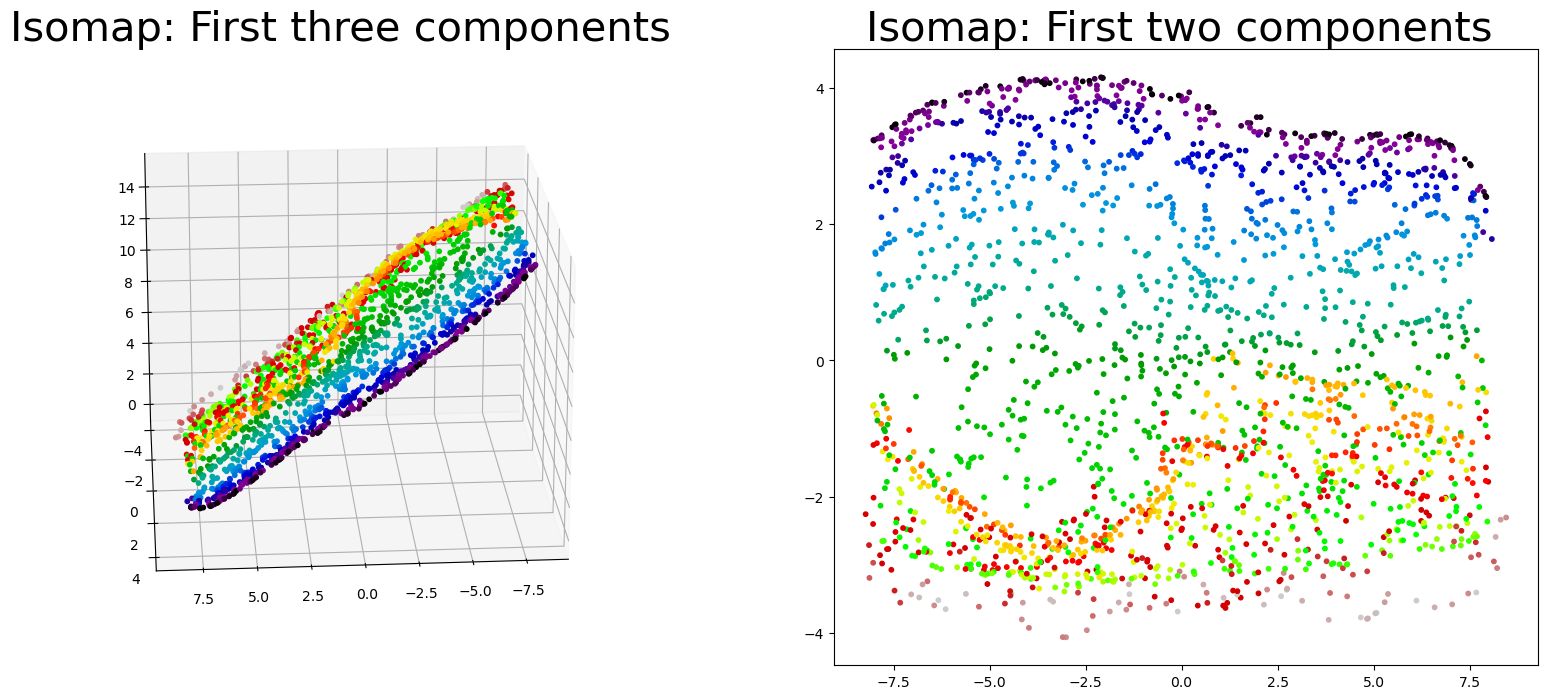

In [13]:
fig=plt.figure(figsize=(20,8))


ax0 = fig.add_subplot(1,2,1,projection="3d")
fig.add_axes(ax0)
ax0.scatter(swiss_roll_isomap[:, 0], swiss_roll_isomap[:, 1], swiss_roll[:, 2], c=swiss_roll[:, 3], s=10,alpha=1.0,cmap='nipy_spectral')
ax0.set_title("Isomap: First three components", fontsize=30)
ax0.view_init(azim=86, elev=20)

ax1 = fig.add_subplot(1,2,2)

fig.add_axes(ax1)
ax1.scatter(swiss_roll_isomap[:, 0], swiss_roll_isomap[:, 1], c=swiss_roll[:, 3], s=10,alpha=1.0,cmap='nipy_spectral')
ax1.set_title("Isomap: First two components ", fontsize=30);